In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#A continuación se crea la variable que guardará la dirección del dataset.
#La misma se encuentra almacenada en Github

url_Housing = 'https://raw.githubusercontent.com/francolange00/CoderHouse_Data_Science/main/Housing.csv'

#Se crea el dataframe para el dataset:
df_Housing = pd.read_csv(url_Housing, index_col=0).reset_index()

df_Housing.head(5)

df_Housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
X = df_Housing[['area', 'bedrooms', 'bathrooms', 'mainroad', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]

X['mainroad'] = X['mainroad'].replace({'yes':1, 'no':0})
X['basement'] = X['basement'].replace({'yes':1, 'no':0})
X['hotwaterheating'] = X['hotwaterheating'].replace({'yes':1, 'no':0})
X['airconditioning'] = X['airconditioning'].replace({'yes':1, 'no':0})
X['prefarea'] = X['prefarea'].replace({'yes':1, 'no':0})

X.head(5)
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   area             545 non-null    int64
 1   bedrooms         545 non-null    int64
 2   bathrooms        545 non-null    int64
 3   mainroad         545 non-null    int64
 4   basement         545 non-null    int64
 5   hotwaterheating  545 non-null    int64
 6   airconditioning  545 non-null    int64
 7   parking          545 non-null    int64
 8   prefarea         545 non-null    int64
dtypes: int64(9)
memory usage: 38.4 KB


<ipython-input-61-361d50960fee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mainroad'] = X['mainroad'].replace({'yes':1, 'no':0})
<ipython-input-61-361d50960fee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['basement'] = X['basement'].replace({'yes':1, 'no':0})
<ipython-input-61-361d50960fee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
y = df_Housing['price']
y.head(5)

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [ ]:
# Se dividen os datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Se crea un modelo de regresión lineal
modelo_regresion = LinearRegression()

# Se entrena el modelo
modelo_regresion.fit(X_train, y_train)

# Se realizan predicciones en el conjunto de prueba
y_pred = modelo_regresion.predict(X_test)

#Se evaluar el modelo

r2 = r2_score(y_test, y_pred)
# Se imprimen resultados

print(f"Coeficiente de determinación (R²): {r2}")
train_data = X_train.join(y_train)

Coeficiente de determinación (R²): 0.6298638540132067


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'parking'}>],
       [<Axes: title={'center': 'prefarea'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

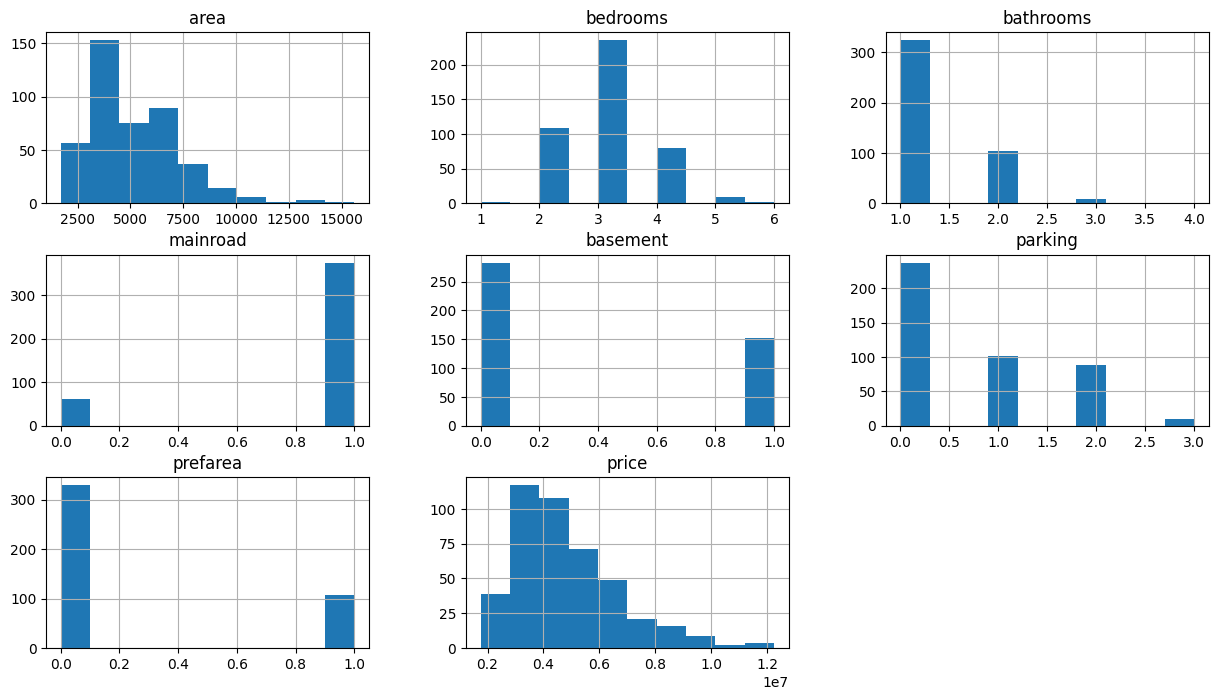

In [ ]:
train_data.hist(figsize=(15,8))

<Axes: >

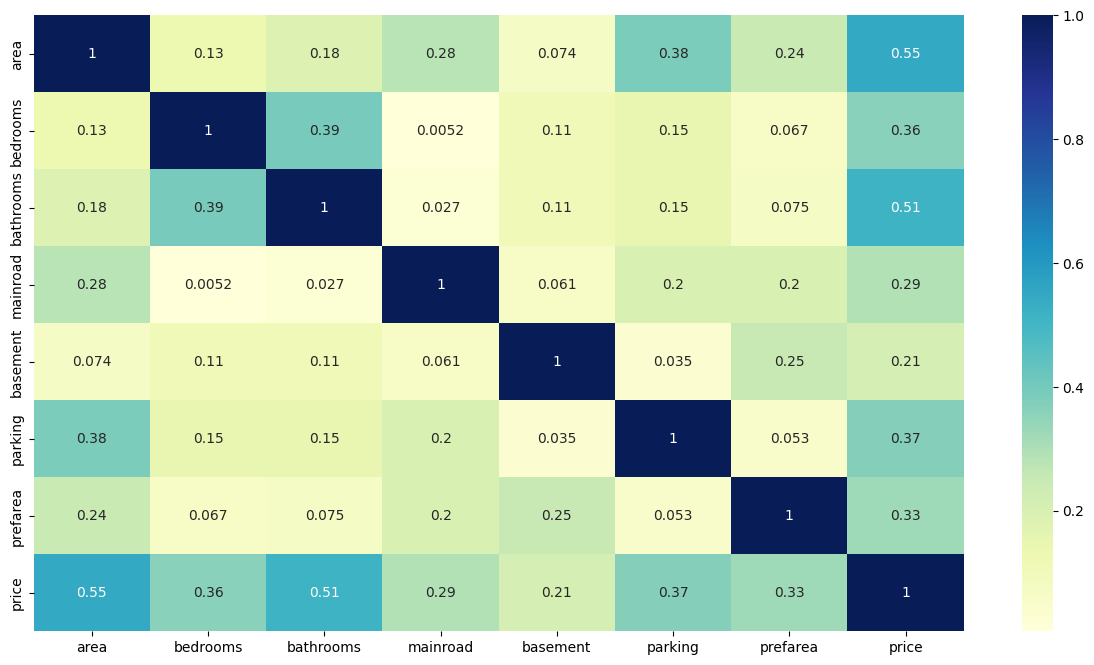

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")